In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action = 'ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('F:\data science\project\project 10 DMart\DMart\Train.csv')
test = pd.read_csv('F:\\data science\\project\\project 10 DMart\\DMart\\test.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

In [7]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [8]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

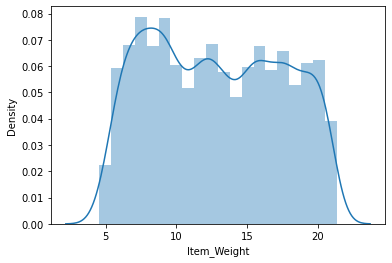

In [10]:
plt.subplot()
sns.distplot(train['Item_Weight'])
plt.show()

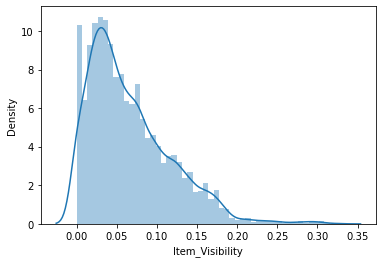

In [11]:
plt.subplot()
sns.distplot(train['Item_Visibility'])
plt.show()

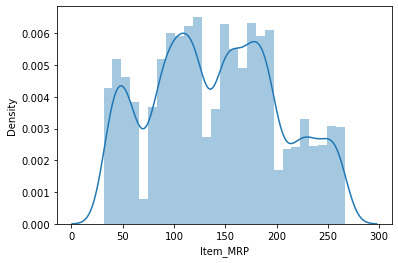

In [12]:
plt.subplot()
sns.distplot(train['Item_MRP'])
plt.show()

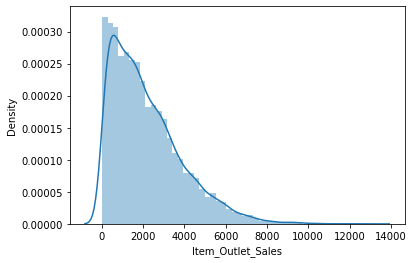

In [13]:
plt.subplot()
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

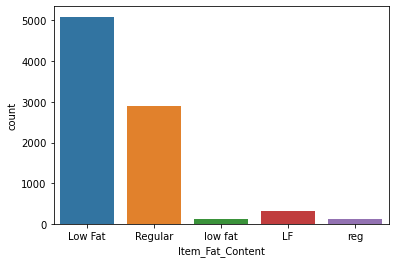

In [14]:
plt.subplot()
sns.countplot(train['Item_Fat_Content'])
plt.show()

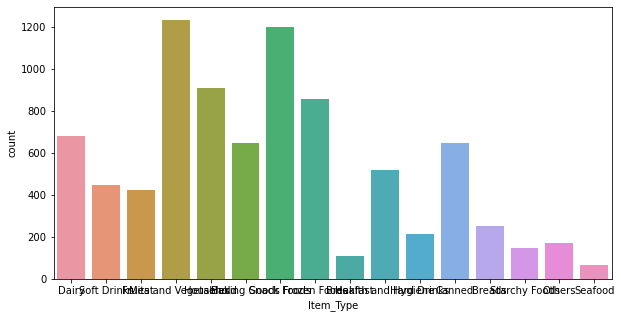

In [15]:

plt.figure(figsize=(10,5))
sns.countplot(train['Item_Type'])
plt.show()

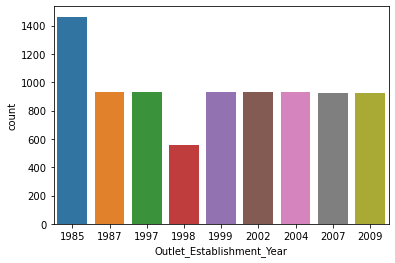

In [16]:
plt.subplot()
sns.countplot(train['Outlet_Establishment_Year'])
plt.show()

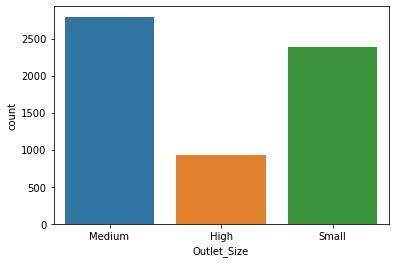

In [17]:
plt.subplot()
sns.countplot(train['Outlet_Size'])
plt.show()

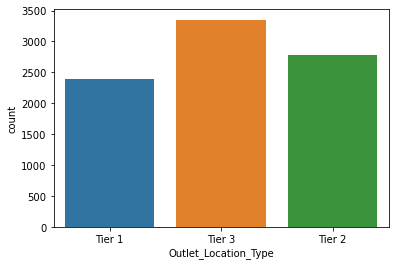

In [18]:
plt.subplot()
sns.countplot(train['Outlet_Location_Type'])
plt.show()

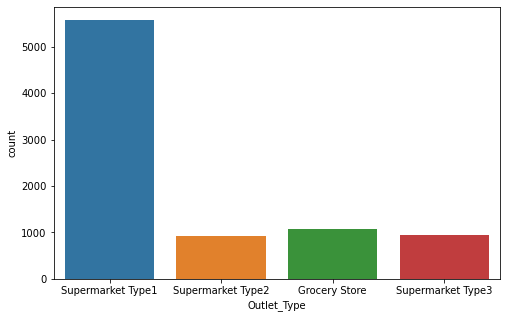

In [19]:

plt.figure(figsize=(8,5))
sns.countplot(train['Outlet_Type'])
plt.show()

<AxesSubplot:>

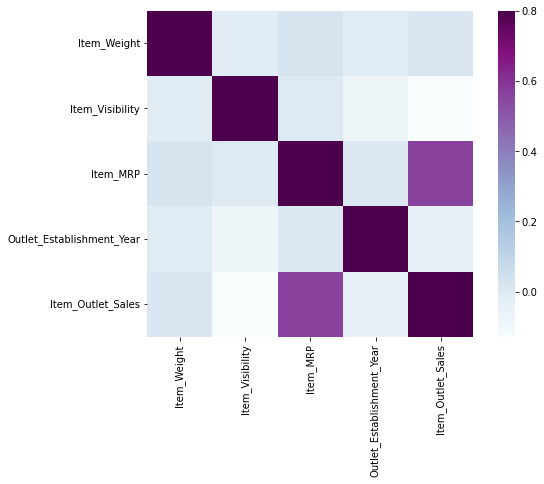

In [20]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

In [21]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
train['Item_Weight'].fillna(train['Item_Weight'].mode()[0], inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [24]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()
train['Item_Identifier']=le.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])
train['Item_Type']=le.fit_transform(train['Item_Type'])
train['Outlet_Identifier']=le.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']=le.fit_transform(train['Outlet_Type'])

In [29]:
train.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'],axis=1,inplace=True)

In [30]:
X = train.drop('Item_Outlet_Sales',1)
y = train.Item_Outlet_Sales

In [31]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=7)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=7)
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(model_pred)
model_accuracy = round(model.score(X_train, y_train)*100)
print(model_accuracy)

[2.30154282e+03 3.78315763e+03 3.45894640e+00 ... 2.26974374e+03
 2.80098736e+03 3.88426677e+03]
51


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=7)
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(model_pred)
model_accuracy = round(model.score(X_train, y_train)*100)
print(model_accuracy)

[3954.852  3791.0652   95.2094 ... 1976.0944 4152.5946 3904.917 ]
100


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=7)
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(model_pred)
model_accuracy = round(model.score(X_train, y_train)*100)
print(model_accuracy)

[2727.895786 3825.373874  217.403674 ... 2041.80886  3625.74706
 4355.324042]
94
